

https://cs231n.github.io/neural-networks-case-study/



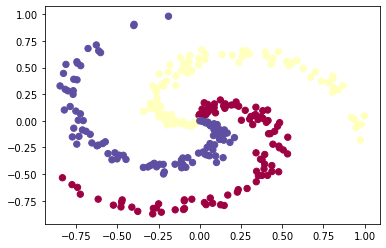

In [38]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [39]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [40]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

In [41]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [42]:
correct_logprobs = -np.log(probs[range(num_examples),y])


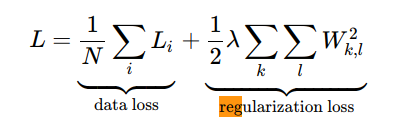

In [43]:
# compute the loss: average cross-entropy loss and regularization
reg = ____ ## reg represents the lambda parameter in the equation above 
           ### this lambda is also called the 'weight decay' coefficient for l2 regularization
           ### CHOOSE A VALUE BETWEEN 0 AND 1

data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [44]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


In [45]:
correct_logprobs = -np.log(probs[range(num_examples),y])
correct_logprobs

array([1.09861229, 1.09862628, 1.09864277, 1.09865834, 1.09867125,
       1.09868796, 1.09870436, 1.0987117 , 1.09873572, 1.0987513 ,
       1.09875592, 1.0987836 , 1.09874815, 1.09880727, 1.09881537,
       1.09882123, 1.09885878, 1.09887719, 1.09887485, 1.09882608,
       1.09886061, 1.09886254, 1.09889152, 1.09894008, 1.09888275,
       1.09867863, 1.09889244, 1.0988757 , 1.09893401, 1.09882668,
       1.09870688, 1.09874655, 1.09863214, 1.0987665 , 1.09878094,
       1.09871276, 1.09888715, 1.09875811, 1.09873693, 1.09884704,
       1.09868508, 1.09871305, 1.09886444, 1.0985239 , 1.09852751,
       1.09823147, 1.09856757, 1.09864632, 1.09870033, 1.09837952,
       1.09822007, 1.09814612, 1.09814133, 1.09836124, 1.09833695,
       1.09850249, 1.09808103, 1.09831202, 1.09796674, 1.09801246,
       1.09807108, 1.09826191, 1.09790543, 1.097916  , 1.09798518,
       1.09792369, 1.09781654, 1.09799119, 1.09767915, 1.09770754,
       1.09764237, 1.09758793, 1.09752349, 1.09748351, 1.09746

In [46]:
# compute the loss: average cross-entropy loss and regularization
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [47]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [48]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

In [49]:
# perform a parameter update
step_size = 0.01
W += -step_size * dW
b += -step_size * db

In [50]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print(f"iteration {i}: loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.0966789743181191
iteration 10: loss 0.9042211480784521
iteration 20: loss 0.8327231905335366
iteration 30: loss 0.8001783957680477
iteration 40: loss 0.7832065336667575
iteration 50: loss 0.7735285094399565
iteration 60: loss 0.7676596400430375
iteration 70: loss 0.7639396469163128
iteration 80: loss 0.7615026030341605
iteration 90: loss 0.7598651274033049
iteration 100: loss 0.7587428601775053
iteration 110: loss 0.7579614535401024
iteration 120: loss 0.7574103973915539
iteration 130: loss 0.757017721874375
iteration 140: loss 0.7567354990457674
iteration 150: loss 0.7565312144928408
iteration 160: loss 0.7563824658733297
iteration 170: loss 0.7562736156612659
iteration 180: loss 0.7561936277084554
iteration 190: loss 0.7561346404128865


(-1.8737637188791538, 1.9662362811208496)

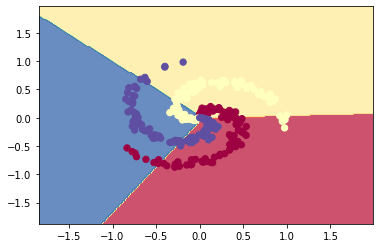

In [51]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [52]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
acc = (np.mean(predicted_class == y))
print(f"training accuracy: {acc}")

training accuracy: 0.5233333333333333


In [53]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [54]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [55]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [56]:
dhidden = np.dot(dscores, W2.T)


In [57]:
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0

In [58]:
# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

In [59]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print(f"iteration {i} loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0 loss 1.0986019136203822
iteration 1000 loss 0.3065817255772139
iteration 2000 loss 0.25739211660243233
iteration 3000 loss 0.24981197209495987
iteration 4000 loss 0.24709684189072656
iteration 5000 loss 0.2463409855426007
iteration 6000 loss 0.24610761075434148
iteration 7000 loss 0.2459708218984627
iteration 8000 loss 0.24580268478730155
iteration 9000 loss 0.2457035108605306


In [63]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
acc = (np.mean(predicted_class == y))
print(f'training accuracy: {acc}') 

training accuracy: 0.9933333333333333


(-1.8737637188791538, 1.9662362811208496)

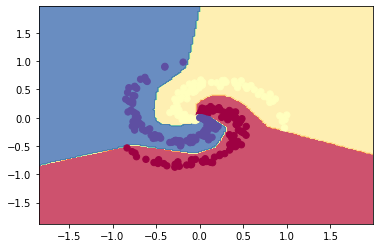

In [60]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
